In [ ]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# 1. Load & View Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DataSets/netflix1.csv")

In [ ]:
# View First Few Column and raw

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.shape   # Total Dataset column and row
print(df.info())   # Data Types
print(df.describe())  # Numerical Summaary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None
       release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


# 2. Data Cleaning

In [ ]:
# 2.1 Check for Missing Values

print('Missing Values')
print(df.isnull().sum())      # There is no any Missing Values in The data


Missing Values
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [ ]:
# 2.2 Check For Duplicate values

print(df.duplicated().sum())   # There is no any Duplicate Value in the Data

0


Data Type Conversion

In [ ]:
# 2.3 Convert Date_Added to datetime

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dtypes

# 2.4 Convert release_year to integer

df['release_year']= pd.to_numeric(df['release_year'], errors='coerce')
print("Data Types after conversion")
df.dtypes

Data Types after conversion


,0
show_id,object
type,object
title,object
director,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object
listed_in,object


Split columns

In [ ]:
# 2.5 Split listed_in (genres) into separate columns for analysis
# We'll keep the original column and create a new one for analysis

df['genre_count'] = df['listed_in'].str.split(',').str.len()
df['primary_genre'] = df['listed_in'].str.split(',').str[0].str.strip()

print("New columns created: 'genre_count' and 'primary_genre'")

New columns created: 'genre_count' and 'primary_genre'


In [ ]:
if 'genres' not in df.columns:
    df['genres'] = df['listed_in'].str.split(', ')
print("\nSample of genres column before exploding (first 5 rows):")
print(df['genres'].head())


Sample of genres column before exploding (first 5 rows):
0                                      [Documentaries]
1    [Crime TV Shows, International TV Shows, TV Ac...
2                 [TV Dramas, TV Horror, TV Mysteries]
3                 [Children & Family Movies, Comedies]
4    [Dramas, Independent Movies, International Mov...
Name: genres, dtype: object


In [ ]:
df_exploded = df.explode('genres')
print("\nSample of exploded genres (first 5 rows):")
print(df_exploded[['title', 'type', 'genres']].head())


Sample of exploded genres (first 5 rows):
                  title     type                  genres
0  Dick Johnson Is Dead    Movie           Documentaries
1             Ganglands  TV Show          Crime TV Shows
1             Ganglands  TV Show  International TV Shows
1             Ganglands  TV Show   TV Action & Adventure
2         Midnight Mass  TV Show               TV Dramas


In [ ]:
len(df)
df.shape

(8790, 13)

# 3. Exploratory Data Anlysis


Total Content on Netflix:
Total titles: 8790


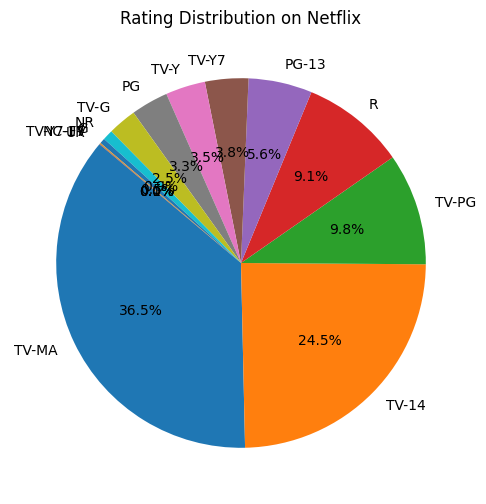

In [ ]:
# 3.1 Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# 3.2 Total Content on Netflix
# Why: To show the total number of titles, giving an overview of dataset size
print("\nTotal Content on Netflix:")
total_content = len(df)
print(f"Total titles: {total_content}")

# 3.2 Rating Distribution (Pie Chart and Bar Chart)
# Why: To visualize the proportion and count of each rating (e.g., PG-13, TV-MA)

rating_counts = df['rating'].value_counts()
#Pie Chart

plt.figure(figsize=(12, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating Distribution on Netflix')

plt.show()

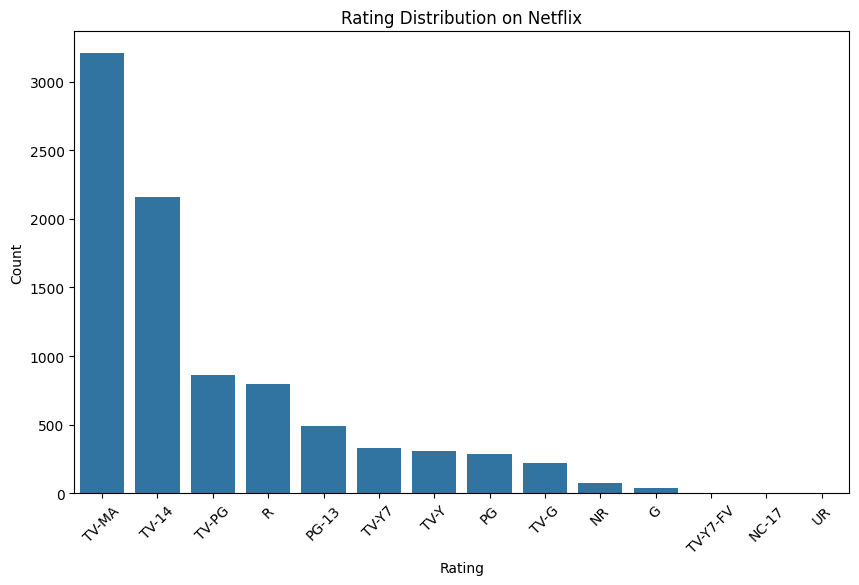


Rating Counts:
rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


In [ ]:
# 3.4 Rating Distribution using Bar chart

# Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', order=rating_counts.index)
plt.title('Rating Distribution on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print("\nRating Counts:")
print(rating_counts)

plt.show()

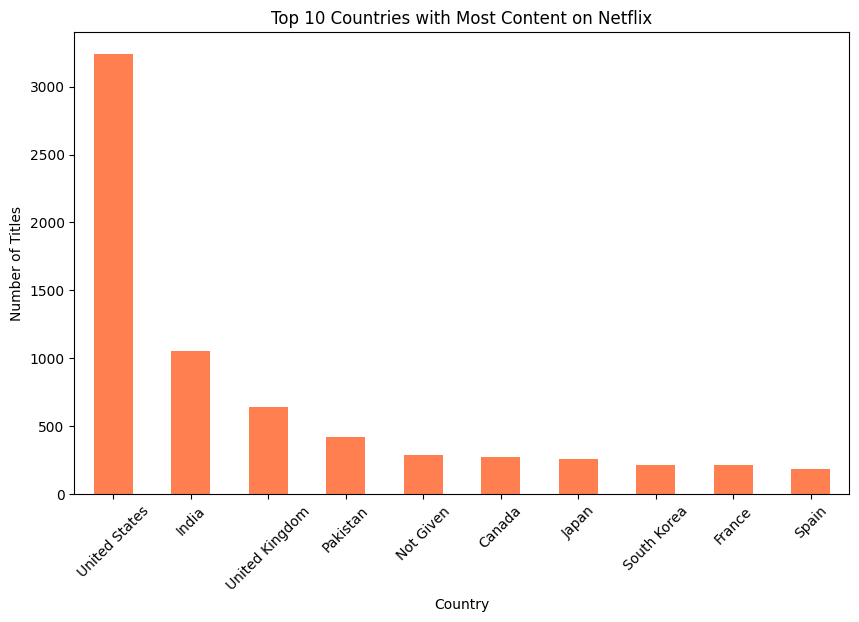


Top 10 Countries:
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64


In [ ]:
# 3.5 Top 10 Countries with Most Content
# Why: To identify which countries contribute the most content, excluding 'Unknown'

top_countries = df[df['country'] != 'Unknown']['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='coral')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()
print("\nTop 10 Countries:")
print(top_countries)

plt.show()

<Figure size 1200x600 with 0 Axes>

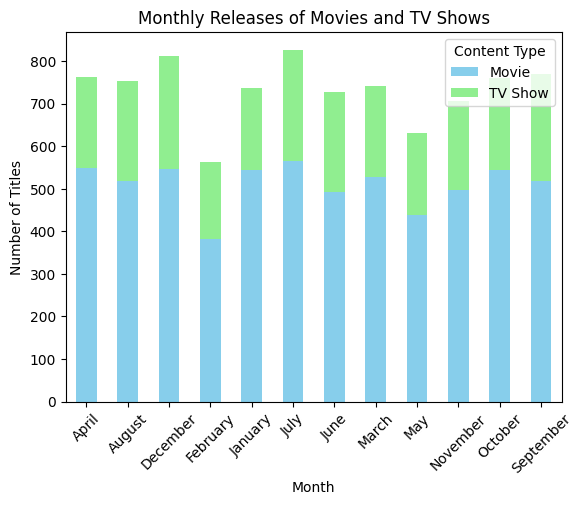


Monthly Releases:
type         Movie  TV Show
month_added                
April          549      214
August         518      236
December       547      265
February       382      180
January        545      192
July           565      262
June           492      236
March          528      213
May            439      193
November       498      207
October        545      215
September      518      251


In [ ]:
# 3.6 Monthly Releases of Movies and TV Shows
# Why: To compare monthly release patterns for Movies and TV Shows

monthly_releases = df.groupby(['month_added', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
monthly_releases.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])
plt.title('Monthly Releases of Movies and TV Shows')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()
print("\nMonthly Releases:")
print(monthly_releases)

plt.show()

<Figure size 1200x600 with 0 Axes>

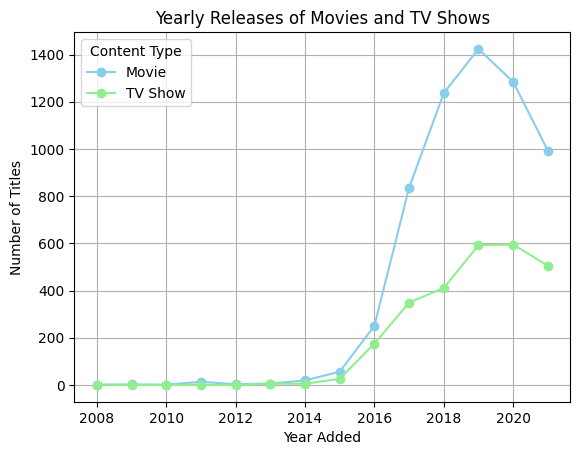


Yearly Releases:
type        Movie  TV Show
year_added                
2008            1        1
2009            2        0
2010            1        0
2011           13        0
2012            3        0
2013            6        5
2014           19        5
2015           56       26
2016          251      175
2017          836      349
2018         1237      411
2019         1424      592
2020         1284      595
2021          993      505


In [ ]:
# 3.7 Yearly Releases of Movies and TV Shows
# Why: To analyze trends in content addition over years

yearly_releases = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
yearly_releases.plot(kind='line', marker='o', color=['skyblue', 'lightgreen'])
plt.title('Yearly Releases of Movies and TV Shows')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()
print("\nYearly Releases:")
print(yearly_releases)

plt.show()

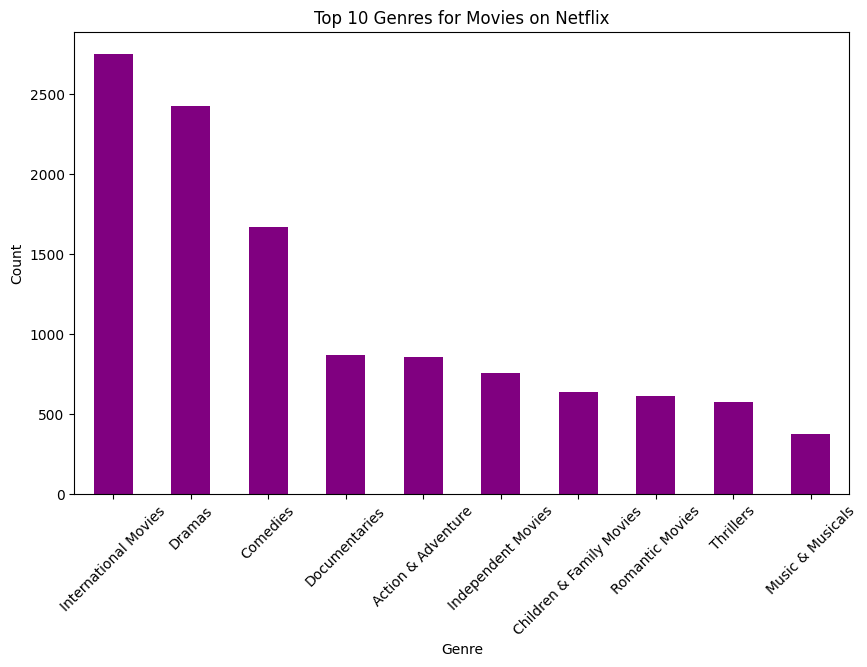


Top 10 Movie Genres:
genres
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64


In [ ]:
# 3.8 Top 10 Popular Genres for Movies
# Why: To find the most common genres for Movies using exploded genres

movies_df = df_exploded[df_exploded['type'] == 'Movie']
movie_genres = movies_df['genres'].value_counts().head(10)
plt.figure(figsize=(10, 6))
movie_genres.plot(kind='bar', color='purple')
plt.title('Top 10 Genres for Movies on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print("\nTop 10 Movie Genres:")
print(movie_genres)

plt.show()

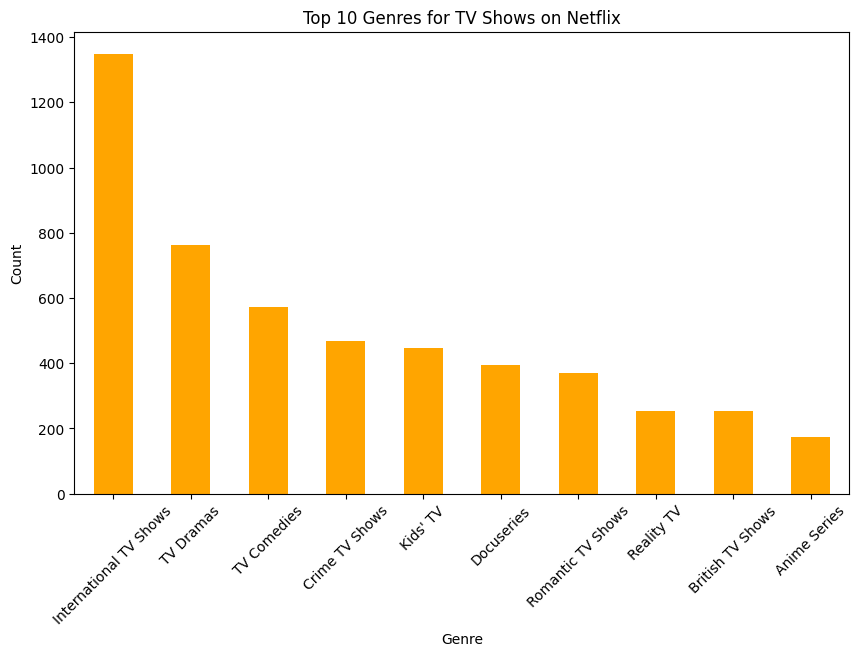


Top 10 TV Show Genres:
genres
International TV Shows    1349
TV Dramas                  762
TV Comedies                573
Crime TV Shows             469
Kids' TV                   448
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               174
Name: count, dtype: int64


In [ ]:
# 3.9 Top 10 Popular Genres for TV Shows
# Why: To find the most common genres for TV Shows using exploded genres

tv_df = df_exploded[df_exploded['type'] == 'TV Show']
tv_genres = tv_df['genres'].value_counts().head(10)
plt.figure(figsize=(10, 6))
tv_genres.plot(kind='bar', color='orange')
plt.title('Top 10 Genres for TV Shows on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print("\nTop 10 TV Show Genres:")
print(tv_genres)

plt.show()


7. Word Cloud of Titles


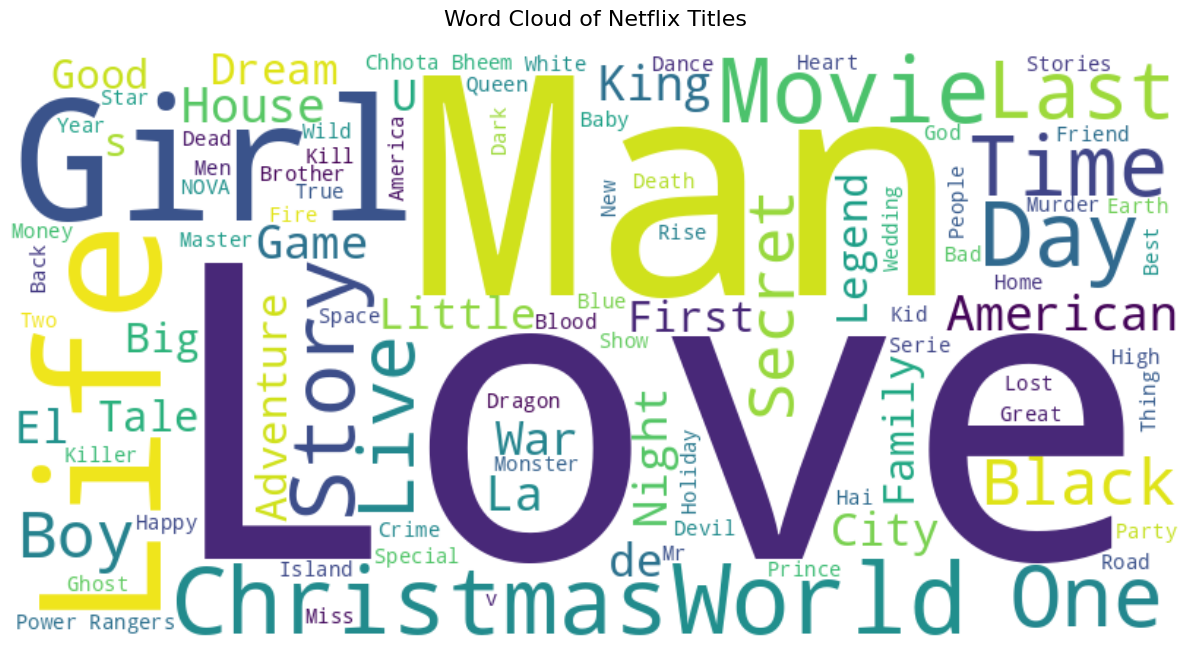

In [ ]:
# Word Cloud For Movie Titles

print("\n7. Word Cloud of Titles")

  # Combine all titles into one string
all_titles = ' '.join(df['title'].astype(str))
  # Create Word Cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      max_words=100,
                      colormap='viridis').generate(all_titles)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 4. Feature Engineering

In [ ]:
# Import Required Libraries
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Create new features to enhance analysis (duration in minutes for Movies, seasons for TV Shows)
df['duration_minutes'] = df[df['type'] == 'Movie']['duration'].str.extract(r'(\d+)').astype(float)
df['duration_seasons'] = df[df['type'] == 'TV Show']['duration'].str.extract(r'(\d+)').astype(float)

# Fill NaN values (Movies have 0 seasons, TV Shows have 0 minutes)
df['duration_minutes'].fillna(0, inplace=True)
df['duration_seasons'].fillna(0, inplace=True)

# Verify new columns
print("\nFeature Engineering: Sample of duration_minutes and duration_seasons (first 5 rows):")
print(df[['type', 'duration', 'duration_minutes', 'duration_seasons']].head())

# Basic analysis of duration
print("\nAverage Movie Duration (minutes):", df[df['type'] == 'Movie']['duration_minutes'].mean())
print("Average TV Show Seasons:", df[df['type'] == 'TV Show']['duration_seasons'].mean())


Feature Engineering: Sample of duration_minutes and duration_seasons (first 5 rows):
      type  duration  duration_minutes  duration_seasons
0    Movie    90 min              90.0               0.0
1  TV Show  1 Season               0.0               1.0
2  TV Show  1 Season               0.0               1.0
3    Movie    91 min              91.0               0.0
4    Movie   125 min             125.0               0.0

Average Movie Duration (minutes): 99.58488410055502
Average TV Show Seasons: 1.7518768768768769


In [ ]:
# Recommend similar titles based on genre similarity using cosine similarity

# Combine genres into a single string for vectorization
df['genres_str'] = df['genres'].apply(lambda x: ' '.join(x))

# Create TF-IDF matrix for genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genres_str'])

# Calculate cosine similarity between titles
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on title
def get_recommendations(title, cosine_sim=cosine_sim, df=df):
    # Find index of the title
    idx = df[df['title'] == title].index[0]
    # Get similarity scores for that title
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort by similarity score (descending)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get top 5 similar titles (excluding itself)
    sim_scores = sim_scores[1:6]
    # Get title indices
    title_indices = [i[0] for i in sim_scores]
    # Return recommended titles
    return df['title'].iloc[title_indices]

# Example: Recommend titles similar to "Ganglands"
print("\nMachine Learning: Recommendations for 'Ganglands':")
print(get_recommendations('Ganglands'))


Machine Learning: Recommendations for 'Ganglands':
24            Bangkok Breaking
390     The Eagle of El-Se'eed
486                  The Truth
576              Fatal Destiny
1177                    Dealer
Name: title, dtype: object


In [ ]:
# Advanced Visualization (Interactive Plot and Tableau Export)

# Plot: Movie vs. TV Show releases by year (using Plotly)
fig = px.line(df.groupby(['year_added', 'type']).size().unstack(fill_value=0).reset_index(),
              x='year_added', y=['Movie', 'TV Show'],
              title='Interactive Plot: Yearly Releases of Movies and TV Shows',
              labels={'year_added': 'Year Added', 'value': 'Number of Titles', 'variable': 'Content Type'})
fig.update_layout(xaxis_title='Year Added', yaxis_title='Number of Titles', legend_title='Content Type')
fig.show()


# Why: To enable interactive dashboard creation in Tableau
df.to_csv('cleaned_netflix.csv', index=False)
df_exploded.to_csv('exploded_netflix.csv', index=False)

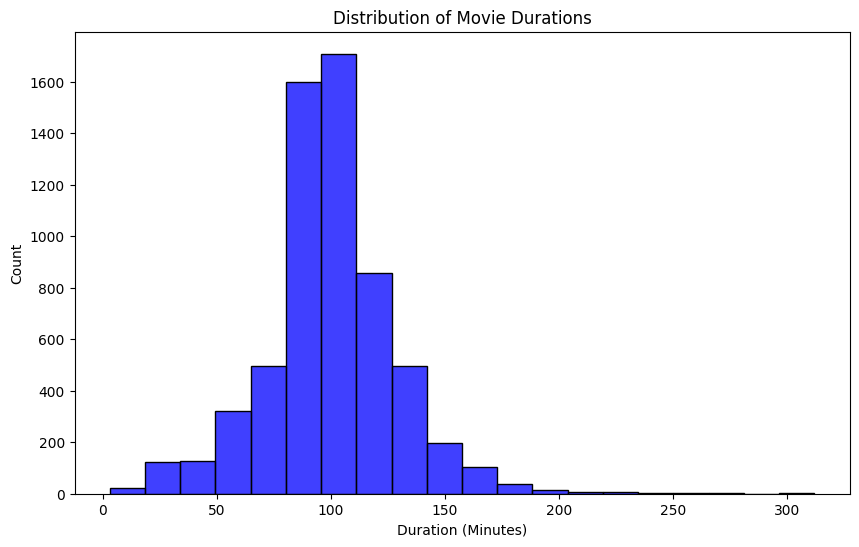

In [ ]:
# Visualize duration distribution for Movies (to complement feature engineering)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['type'] == 'Movie']['duration_minutes'].dropna(), bins=20, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')

plt.show()

# END